# Cells with diff ATP conc
## cell 1

In [1]:
from subsbml import System, createSubsystem, combineSystems, createNewSubsystem

import numpy as np
import pylab as plt

ss1 = createSubsystem('transporter.xml')
ss2 = createSubsystem('atc_external_reservoir.xml')

# Create a simple atc membrane where atc goes in an out of the membrane via a reversible reaction
mb1 = createSubsystem('membrane_atc.xml', membrane = True)

mb2 = createSubsystem('dnaexp_membrane1.xml', membrane = True)

cell_1 =  System('cell_1',ListOfInternalSubsystems = [ss1],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb1,mb2])

cell_1_model = cell_1.getModel()
cell_1_model.setSpeciesAmount('atc_e', 1e4, compartment = 'cell_1_external')
cell_1_model.setSpeciesAmount('ssDNA', 50, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('dna_g', 1, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('tetR', 10, compartment = 'cell_1_internal')
cell_1_model.setSpeciesAmount('ATP', 28, compartment = 'cell_1_internal')
cell_1_model.getSBMLDocument().getModel().getCompartment(1).setSize(1e-4) 
cell_1_model.writeSBML('cell_1_model.xml')




The subsystem from membrane_atc.xml has multiple compartments
The subsystem from dnaexp_membrane1.xml has multiple compartments


1

In [32]:
timepoints = np.linspace(0,40000,10000)
results_1, _ = cell_1_model.simulateWithBioscrape(timepoints)

VirE2_b_id1 = cell_1_model.getSpeciesByName('VirE2_b', compartment = 'cell_1_internal').getId()
ssDNA_e_id1 = cell_1_model.getSpeciesByName('ssDNA_e', compartment = 'cell_1_external').getId()
ssDNA_id1 = cell_1_model.getSpeciesByName('ssDNA', compartment = 'cell_1_internal').getId()
VirE2_b_ssDNA_id1 = cell_1_model.getSpeciesByName('VirE2_b_ssDNA', compartment = 'cell_1_internal').getId()
ATP_id1 = cell_1_model.getSpeciesByName('ATP', compartment = 'cell_1_internal').getId()
#rna_id1 = cell_1_model.getSpeciesByName('rna_g', compartment = 'cell_1_internal').getId()

colors=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d']
export_plot = bokeh.plotting.figure(width = 800, height = 450, 
                         x_axis_label = 'Time (sec)',
                         y_axis_label = 'Concentration', #(μM)
                         title = 'Export Plot')
export_plot.line(timepoints, results_1[ssDNA_e_id1], color = colors[0],line_width = 3, legend_label = 'ssDNA_e')
export_plot.line(timepoints, results_1[VirE2_b_id1], color = colors[1], line_width = 3,legend_label = 'aHL_b')
export_plot.line(timepoints, results_1[VirE2_b_ssDNA_id1], color = colors[2], line_width = 3,legend_label = 'ssDNA_bound')
export_plot.line(timepoints, results_1[ssDNA_id1], color = colors[3], line_width = 3,legend_label = 'ssDNA_i')
export_plot.legend.location = 'center_right'
export_plot.legend.click_policy="hide"
#, 'bottom_center', 'bottom_right') or Tuple(Float, Float), got 'best'
bokeh.io.show(export_plot)


## cell 2

In [105]:
from subsbml import System, createSubsystem, combineSystems, createNewSubsystem

import numpy as np
import pylab as plt

ss1 = createSubsystem('transporter.xml')
ss2 = createSubsystem('atc_external_reservoir.xml')

# Create a simple atc membrane where atc goes in an out of the membrane via a reversible reaction
mb1 = createSubsystem('membrane_atc.xml', membrane = True)

mb2 = createSubsystem('dnaexp_membrane1.xml', membrane = True)

cell_2 =  System('cell_2',ListOfInternalSubsystems = [ss1],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb1, mb2])

cell_2_model = cell_2.getModel()
cell_2_model.setSpeciesAmount('atc_e', 1e4, compartment = 'cell_2_external')
cell_2_model.setSpeciesAmount('ssDNA', 50, compartment = 'cell_2_internal')
cell_2_model.setSpeciesAmount('dna_g', 1, compartment = 'cell_2_internal')
cell_2_model.setSpeciesAmount('tetR', 10, compartment = 'cell_2_internal')
cell_2_model.setSpeciesAmount('ATP', 30, compartment = 'cell_2_internal')
cell_2_model.getSBMLDocument().getModel().getCompartment(1).setSize(1e-4) 
cell_2_model.writeSBML('cell_2_model.xml')

from subsbml import System, createSubsystem, combineSystems, createNewSubsystem




The subsystem from membrane_atc.xml has multiple compartments
The subsystem from dnaexp_membrane1.xml has multiple compartments


C:\Users\Agrima\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:93: UserWarning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations.
  'Please check rate expressions and ensure they are non-negative before doing '+
C:\Users\Agrima\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:208: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


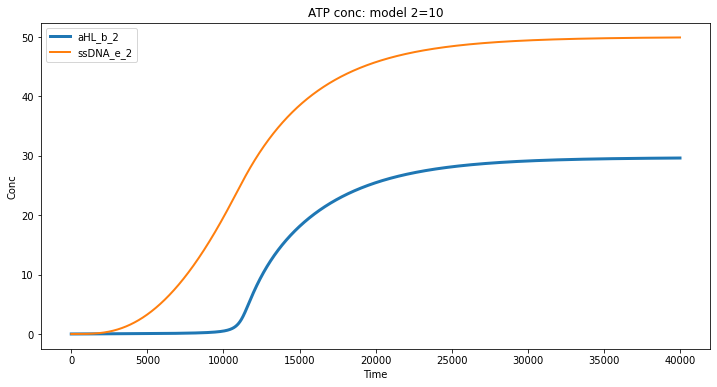

In [106]:

results_2, _ = cell_2_model.simulateWithBioscrape(timepoints)

VirE2_b_id2 = cell_2_model.getSpeciesByName('VirE2_b', compartment = 'cell_2_internal').getId()
ssDNA_e_id2 = cell_2_model.getSpeciesByName('ssDNA_e', compartment = 'cell_2_external').getId()
ssDNA_id2 = cell_2_model.getSpeciesByName('ssDNA', compartment = 'cell_2_internal').getId()
VirE2_b_ssDNA_id2 = cell_2_model.getSpeciesByName('VirE2_b_ssDNA', compartment = 'cell_2_internal').getId()


plt.figure(figsize=(12,6))

plt.plot(timepoints, results_2[VirE2_b_id2], linewidth = 3, label = 'aHL_b_2')
plt.plot(timepoints, results_2[ssDNA_e_id2], linewidth =2, label = 'ssDNA_e_2')
#plt.plot(timepoints, results_2[VirE2_b_ssDNA_id2], linewidth = 3, label = 'ssDNA_bound_2')
#plt.plot(timepoints, results_2[ssDNA_id2], linewidth = 3, label = 'ssDNA_i_2')


plt.title("ATP conc: model 2=10")
plt.xlabel('Time')
plt.ylabel('Conc')
plt.legend()
plt.show()

# Comparison Plot

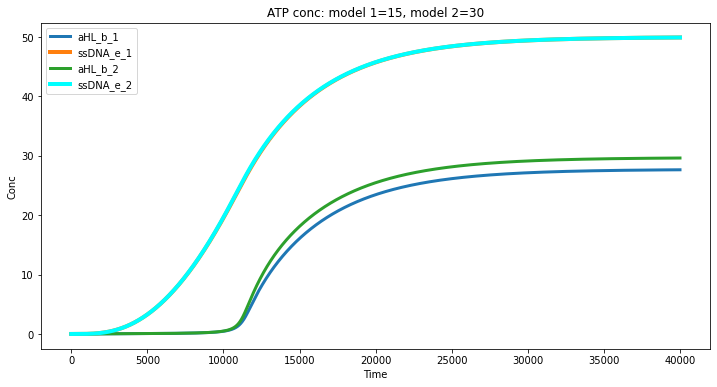

In [107]:

plt.figure(figsize=(12,6))
plt.plot(timepoints, results_1[VirE2_b_id1], linewidth = 3, label = 'aHL_b_1')
plt.plot(timepoints, results_1[ssDNA_e_id1], linewidth = 4, label = 'ssDNA_e_1')
#plt.plot(timepoints, results_1[VirE2_b_ssDNA_id1], linewidth = 3, label = 'ssDNA_bound_1')
#plt.plot(timepoints, results_1[ssDNA_id1], linewidth = 3, label = 'ssDNA_i_1')

plt.plot(timepoints, results_2[VirE2_b_id2], linewidth = 3, label = 'aHL_b_2')
plt.plot(timepoints, results_2[ssDNA_e_id2], "cyan", linewidth =4, label = 'ssDNA_e_2')
#plt.plot(timepoints, results_2[VirE2_b_ssDNA_id2], linewidth = 3, label = 'ssDNA_bound_2')
#plt.plot(timepoints, results_2[ssDNA_id2], linewidth = 3, label = 'ssDNA_i_2')

plt.title("ATP conc: model 1=15, model 2=30")
plt.xlabel('Time')
plt.ylabel('Conc')
plt.legend()
plt.show()

## cell 3

In [ ]:
from subsbml import System, createSubsystem, combineSystems, createNewSubsystem

import numpy as np
import pylab as plt

ss1 = createSubsystem('transporter.xml')
ss2 = createSubsystem('atc_external_reservoir.xml')

# Create a simple atc membrane where atc goes in an out of the membrane via a reversible reaction
mb1 = createSubsystem('membrane_atc.xml', membrane = True)

mb2 = createSubsystem('dnaexp_membrane1.xml', membrane = True)

cell_3 =  System('cell_3',ListOfInternalSubsystems = [ss1],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb1, mb2])

cell_3_model = cell_3.getModel()
cell_3_model.setSpeciesAmount('atc_e', 1e4, compartment = 'cell_3_external')
cell_3_model.setSpeciesAmount('ssDNA', 50, compartment = 'cell_3_internal')
cell_3_model.setSpeciesAmount('dna_g', 1, compartment = 'cell_3_internal')
cell_3_model.setSpeciesAmount('tetR', 10, compartment = 'cell_3_internal')
cell_3_model.setSpeciesAmount('ATP', 100, compartment = 'cell_3_internal')

cell_3_model.writeSBML('cell_3_model.xml')

